In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import os

def load_and_label_data(base_path, label, max_files=None):
    combined_100KHzdata = []
    combined_2000KHzdata = []

    file_counter = 0

    for timestamp_folder in os.listdir(base_path):
        if max_files and file_counter >= max_files:
            break

        timestamp_folder_path = os.path.join(base_path, timestamp_folder, "raw")
        timestamp = timestamp_folder.split('_')[0] + '_' + timestamp_folder.split('_')[1]
        timestamp = pd.to_datetime(timestamp, format='%Y.%m.%d_%H.%M.%S')

        # Process 2000KHz data
        df_2000KHz = pd.read_parquet(os.path.join(timestamp_folder_path, "Sampling2000KHz_AEKi-0.parquet"))
        df_2000KHz_grouped = df_2000KHz.groupby(df_2000KHz.index // 10000).mean().reset_index(drop=True)
        df_2000KHz_grouped['timestamp'] = timestamp + pd.to_timedelta(df_2000KHz_grouped.index, unit='ms')
        df_2000KHz_grouped['label'] = label

        # Process 100KHz data
        df_100KHz = pd.read_parquet(os.path.join(timestamp_folder_path, "Sampling100KHz_Irms_Grinding-Grinding spindle current L1-Grinding spindle current L2-Grinding spindle current L3-0.parquet"))
        df_100KHz_grouped = df_100KHz.groupby(df_100KHz.index // 10000).mean().reset_index(drop=True)
        df_100KHz_grouped['timestamp'] = timestamp + pd.to_timedelta(df_100KHz_grouped.index, unit='ms')
        df_100KHz_grouped['label'] = label

        combined_100KHzdata.append(df_100KHz_grouped)
        combined_2000KHzdata.append(df_2000KHz_grouped)

        file_counter += 1

    final_combined_100KHzdata = pd.concat(combined_100KHzdata, ignore_index=True)
    final_combined_2000KHzdata = pd.concat(combined_2000KHzdata, ignore_index=True)

    return final_combined_100KHzdata, final_combined_2000KHzdata

# Define the paths to the OK and NOK data directories
ok_data_path = '/content/gdrive/MyDrive/Data/OK_Measurements'
nok_data_path = '/content/gdrive/MyDrive/Data/NOK_Measurements'

# Load OK and NOK data
ok_100KHzdata, ok_2000KHzdata = load_and_label_data(ok_data_path, label=0)
nok_100KHzdata, nok_2000KHzdata = load_and_label_data(nok_data_path, label=1)
# Combine OK and NOK data
all_100KHzdata = pd.concat([ok_100KHzdata, nok_100KHzdata], ignore_index=True)
all_2000KHzdata = pd.concat([ok_2000KHzdata, nok_2000KHzdata], ignore_index=True)

# Print the first few rows of the combined data for inspection
print("Combined 100KHz Data Sample (Mean):")
print(all_100KHzdata.head())
print("\nCombined 2000KHz Data Sample (Mean):")
print(all_2000KHzdata.head())


Combined 100KHz Data Sample (Mean):
   Irms_Grinding_rate100000_clipping0_batch0  \
0                                   0.081839   
1                                   0.081713   
2                                   0.082150   
3                                   0.081962   
4                                   0.081864   

   Grinding spindle current L1_rate100000_clipping0_batch0  \
0                                          -0.000288         
1                                           0.000174         
2                                           0.000098         
3                                          -0.000059         
4                                          -0.000218         

   Grinding spindle current L2_rate100000_clipping0_batch0  \
0                                           0.000256         
1                                           0.000129         
2                                           0.000431         
3                                          -0.000680  

In [ ]:
# Analyzing OK data seperately
all_100KHzdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12177 entries, 0 to 12176
Data columns (total 6 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Irms_Grinding_rate100000_clipping0_batch0                12177 non-null  float64       
 1   Grinding spindle current L1_rate100000_clipping0_batch0  12177 non-null  float64       
 2   Grinding spindle current L2_rate100000_clipping0_batch0  12177 non-null  float64       
 3   Grinding spindle current L3_rate100000_clipping0_batch0  12177 non-null  float64       
 4   timestamp                                                12177 non-null  datetime64[ns]
 5   label                                                    12177 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 570.9 KB


In [ ]:
all_2000KHzdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242891 entries, 0 to 242890
Data columns (total 3 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   AEKi_rate2000000_clipping0_batch0  242891 non-null  float64       
 1   timestamp                          242891 non-null  datetime64[ns]
 2   label                              242891 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.6 MB


In [ ]:
all_100KHzdata.describe()

,Irms_Grinding_rate100000_clipping0_batch0,Grinding spindle current L1_rate100000_clipping0_batch0,Grinding spindle current L2_rate100000_clipping0_batch0,Grinding spindle current L3_rate100000_clipping0_batch0,timestamp,label
count,12177.000000,12177.000000,12177.000000,12177.000000,12177,12177.000000
mean,0.088925,-0.000103,0.000046,0.000302,2024-02-15 00:09:22.744648192,0.457420
min,0.060081,-0.114116,-0.105743,-0.105274,2024-02-14 22:00:10,0.000000
25%,0.084127,-0.000432,-0.000273,-0.000035,2024-02-14 22:06:46.080999936,0.000000
50%,0.087734,-0.000083,0.000065,0.000302,2024-02-14 22:13:45.164000,0.000000
75%,0.092262,0.000270,0.000410,0.000647,2024-02-15 02:33:41.008999936,1.000000
max,0.128379,0.088161,0.110243,0.089396,2024-02-15 02:40:31.196000,1.000000
std,0.006667,0.002418,0.002358,0.002357,NaN,0.498204


In [ ]:
all_2000KHzdata.describe()

,AEKi_rate2000000_clipping0_batch0,timestamp,label
count,242891.000000,242891,242891.000000
mean,-0.000725,2024-02-15 00:09:21.919030016,0.457242
min,-0.004873,2024-02-14 22:00:10,0.000000
25%,-0.001290,2024-02-14 22:06:47.599500032,0.000000
50%,-0.000730,2024-02-14 22:13:48.232000,0.000000
75%,-0.000171,2024-02-15 02:33:41.165500160,1.000000
max,0.003948,2024-02-15 02:40:34.928000,1.000000
std,0.000826,NaN,0.498169


In [ ]:
all_100KHzdata.isnull().sum()

Irms_Grinding_rate100000_clipping0_batch0                  0
Grinding spindle current L1_rate100000_clipping0_batch0    0
Grinding spindle current L2_rate100000_clipping0_batch0    0
Grinding spindle current L3_rate100000_clipping0_batch0    0
timestamp                                                  0
label                                                      0
dtype: int64

In [ ]:
all_2000KHzdata.isnull().sum()

AEKi_rate2000000_clipping0_batch0    0
timestamp                            0
label                                0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

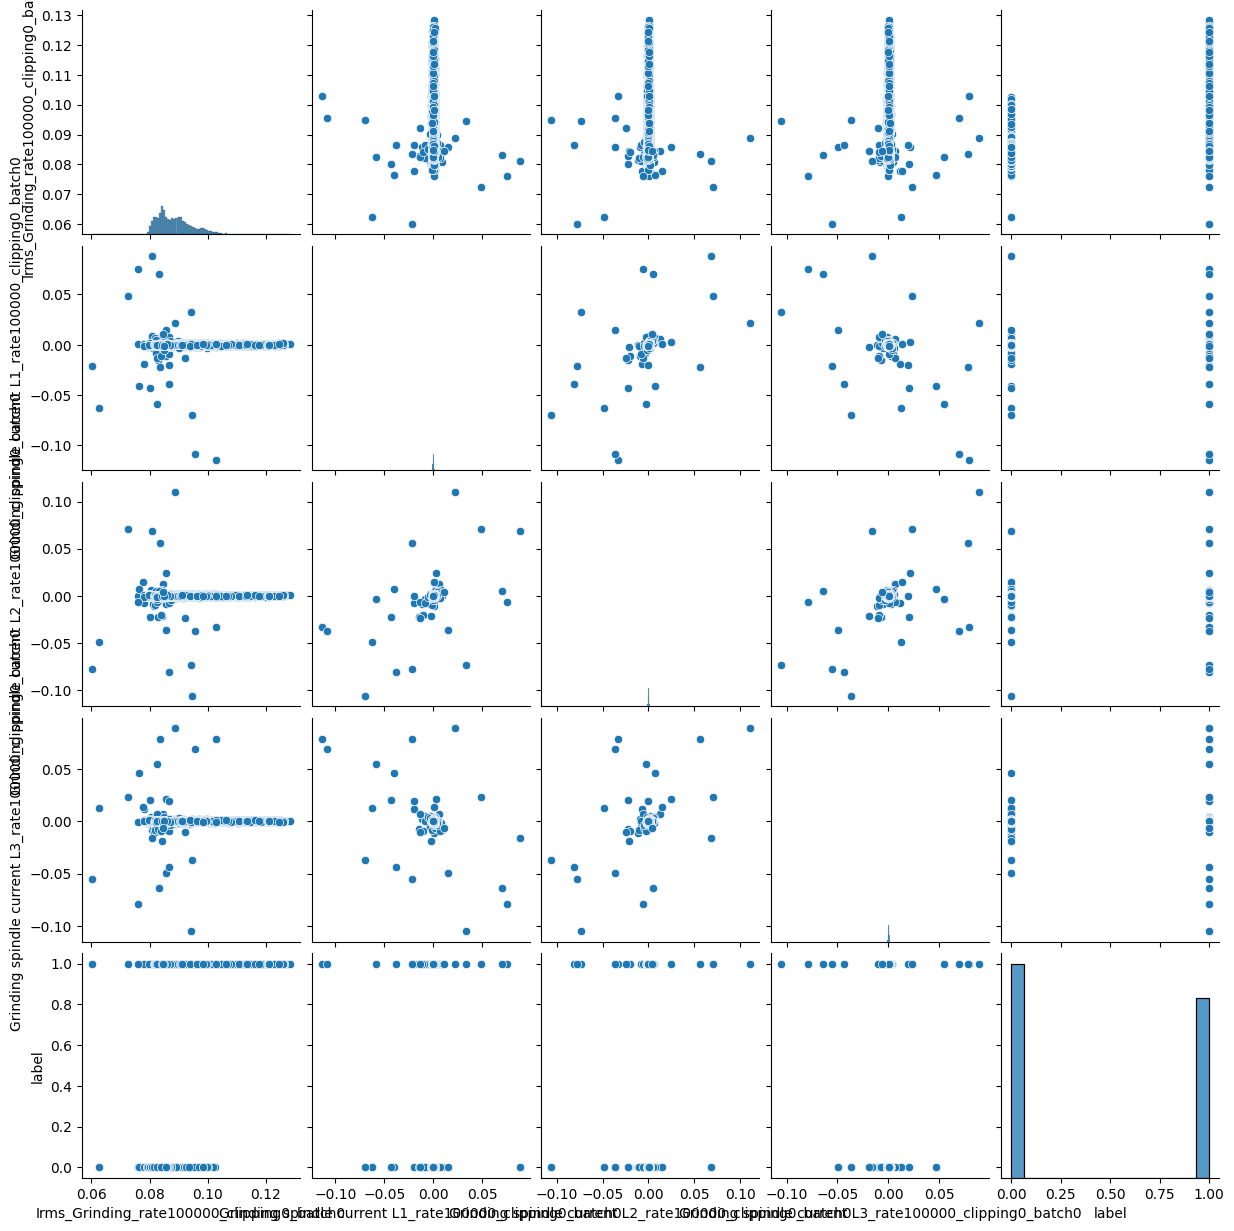

In [ ]:
sns.pairplot(all_100KHzdata.drop(['timestamp'], axis = 1))

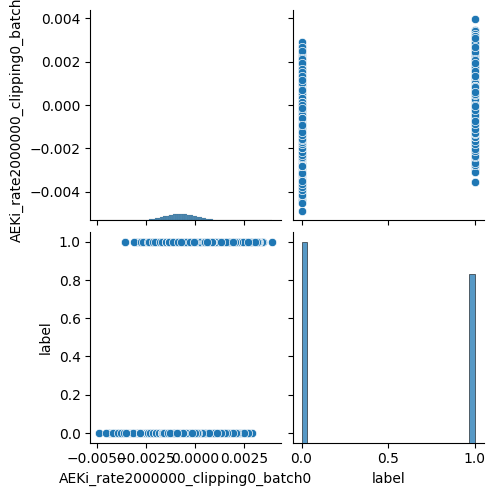

In [ ]:
sns.pairplot(all_2000KHzdata.drop(['timestamp'], axis = 1))

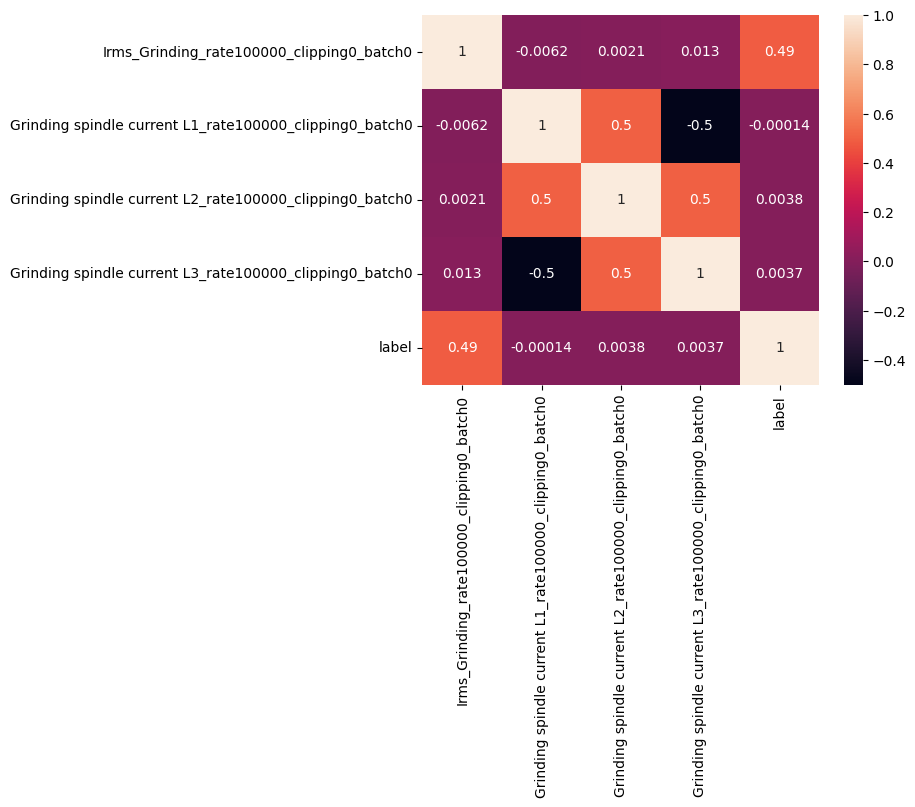

In [ ]:
# Correlation with heatmap
all_100KHzdata.corr(method='pearson')
sns.heatmap(all_100KHzdata.corr(method='pearson').drop(['timestamp'], axis=1).drop(['timestamp'], axis=0),annot = True);

plt.show()

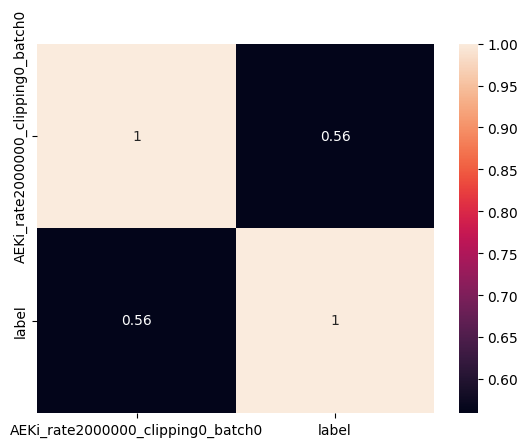

In [ ]:
all_2000KHzdata.corr(method='pearson')
sns.heatmap(all_2000KHzdata.corr(method='pearson').drop(['timestamp'], axis=1).drop(['timestamp'], axis=0),annot = True);

plt.show()

<Axes: >

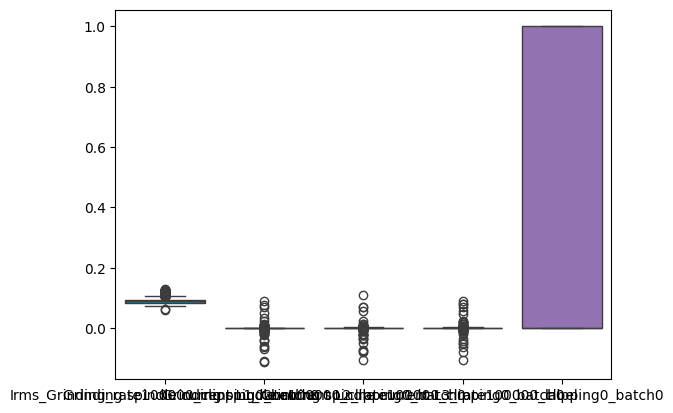

In [ ]:
#Looking for outliners
sns.boxplot(data=all_100KHzdata)

<Axes: xlabel='Irms_Grinding_rate100000_clipping0_batch0'>

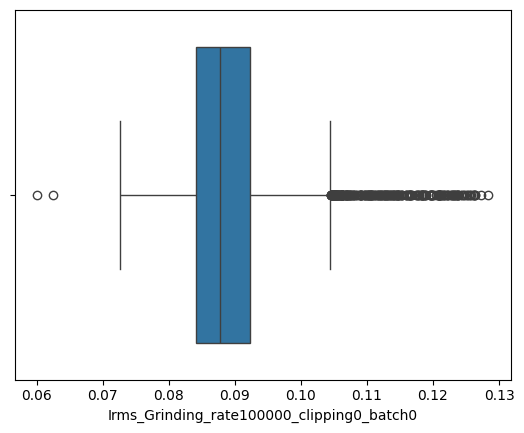

In [ ]:
sns.boxplot(x='Irms_Grinding_rate100000_clipping0_batch0', data=all_100KHzdata)

<Axes: xlabel='Grinding spindle current L1_rate100000_clipping0_batch0'>

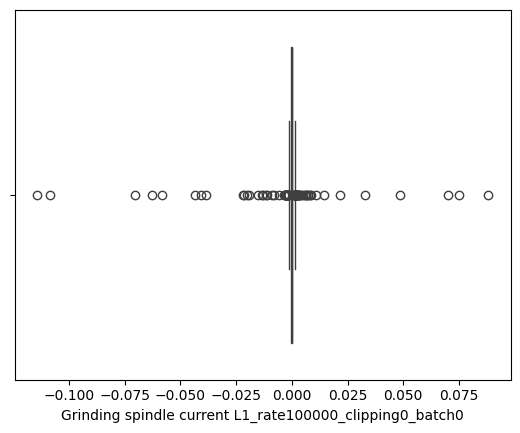

In [ ]:
sns.boxplot(x='Grinding spindle current L1_rate100000_clipping0_batch0', data=all_100KHzdata)

<Axes: >

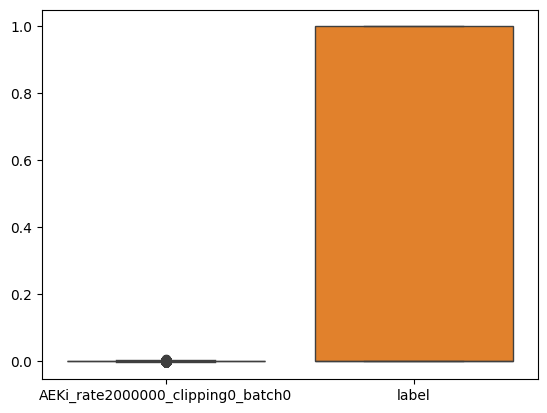

In [ ]:
sns.boxplot(data=all_2000KHzdata)

<Axes: xlabel='AEKi_rate2000000_clipping0_batch0'>

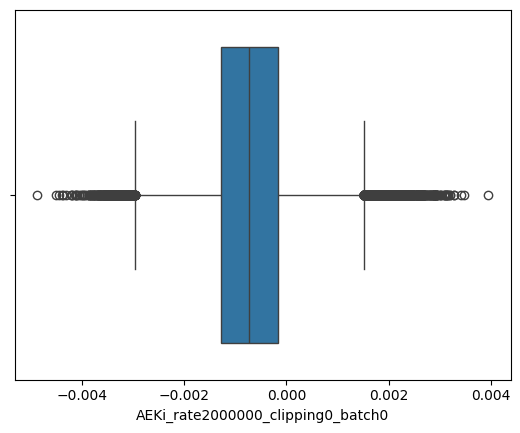

In [ ]:
sns.boxplot(x='AEKi_rate2000000_clipping0_batch0', data=all_2000KHzdata)

In [ ]:
#  Performing T-test for each feature
from scipy.stats import ttest_ind
# Separate data based on label
group0 = all_100KHzdata[all_100KHzdata['label'] == 0]
group1 = all_100KHzdata[all_100KHzdata['label'] == 1]

# Perform t-test for each feature
for feature in ['Irms_Grinding_rate100000_clipping0_batch0',
                'Grinding spindle current L1_rate100000_clipping0_batch0',
                'Grinding spindle current L2_rate100000_clipping0_batch0',
                'Grinding spindle current L3_rate100000_clipping0_batch0']:
    t_stat, p_val = ttest_ind(group0[feature], group1[feature])
    print(f"T-test for {feature}: t-statistic = {t_stat}, p-value = {p_val}")

T-test for Irms_Grinding_rate100000_clipping0_batch0: t-statistic = -61.82984006250284, p-value = 0.0
T-test for Grinding spindle current L1_rate100000_clipping0_batch0: t-statistic = 0.015827423557560793, p-value = 0.9873723296808798
T-test for Grinding spindle current L2_rate100000_clipping0_batch0: t-statistic = -0.42303242707920435, p-value = 0.6722790740187938
T-test for Grinding spindle current L3_rate100000_clipping0_batch0: t-statistic = -0.4072027371493674, p-value = 0.6838662502272579


In [ ]:
from statsmodels.multivariate.manova import MANOVA
# Rename columns to ensure they are valid Python identifiers
all_100KHzdata_renamed=all_100KHzdata
all_100KHzdata_renamed.rename(columns={
    'Irms_Grinding_rate100000_clipping0_batch0': 'Irms_Grinding_rate',
    'Grinding spindle current L1_rate100000_clipping0_batch0': 'Grinding_spindle_current_L1',
    'Grinding spindle current L2_rate100000_clipping0_batch0': 'Grinding_spindle_current_L2',
    'Grinding spindle current L3_rate100000_clipping0_batch0': 'Grinding_spindle_current_L3'
}, inplace=True)

# Separate data based on label
group0 = all_100KHzdata_renamed[all_100KHzdata_renamed['label'] == 0]
group1 = all_100KHzdata_renamed[all_100KHzdata_renamed['label'] == 1]

# Perform t-test for each feature
for feature in ['Irms_Grinding_rate',
                'Grinding_spindle_current_L1',
                'Grinding_spindle_current_L2',
                'Grinding_spindle_current_L3']:
    t_stat, p_val = ttest_ind(group0[feature], group1[feature])
    print(f"T-test for {feature}: t-statistic = {t_stat}, p-value = {p_val}")

# Define the MANOVA model with the new column names
manova = MANOVA.from_formula('Irms_Grinding_rate + Grinding_spindle_current_L1 + Grinding_spindle_current_L2 + Grinding_spindle_current_L3 ~ label', data=all_100KHzdata_renamed)

# Fit the model and print the results
print(manova.mv_test())

T-test for Irms_Grinding_rate: t-statistic = -61.82984006250284, p-value = 0.0
T-test for Grinding_spindle_current_L1: t-statistic = 0.015827423557560793, p-value = 0.9873723296808798
T-test for Grinding_spindle_current_L2: t-statistic = -0.42303242707920435, p-value = 0.6722790740187938
T-test for Grinding_spindle_current_L3: t-statistic = -0.4072027371493674, p-value = 0.6838662502272579
                      Multivariate linear model
                                                                     
---------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF     F Value   Pr > F
---------------------------------------------------------------------
          Wilks' lambda   0.0084 4.0000 12172.0000 360484.9618 0.0000
         Pillai's trace   0.9916 4.0000 12172.0000 360484.9618 0.0000
 Hotelling-Lawley trace 118.4637 4.0000 12172.0000 360484.9618 0.0000
    Roy's greatest root 118.4637 4.0000 12172.0000 360484.9618 0.0000

In [ ]:
# Separate data based on label
aek_group0 = all_2000KHzdata[all_2000KHzdata['label'] == 0]
aek_group1 = all_2000KHzdata[all_2000KHzdata['label'] == 1]

feature='AEKi_rate2000000_clipping0_batch0'
t_stat, p_val = ttest_ind(aek_group0[feature], aek_group1[feature])
print(f"T-test for {feature}: t-statistic = {t_stat}, p-value = {p_val}")

T-test for AEKi_rate2000000_clipping0_batch0: t-statistic = -332.8056816018513, p-value = 0.0


In [ ]:
# Set the timestamp as the index
all_100KHzdata_stamped = all_100KHzdata
all_100KHzdata_stamped.set_index('timestamp', inplace=True)

# Plot time series for one of the variables
all_100KHzdata_stamped['Irms_Grinding_rate100000_clipping0_batch0'].plot(figsize=(12, 6))
plt.title('Time Series analysis of Irms_Grinding_rate100000_clipping0_batch0')
plt.xlabel('Timestamp')
plt.ylabel('Irms_Grinding_rate100000_clipping0_batch0')
plt.show()

KeyError: "None of ['timestamp'] are in the columns"

In [ ]:
all_100KHzdata_stamped['Grinding spindle current L1_rate100000_clipping0_batch0'].plot(figsize=(12, 6))
# plt.title('Time Series of Grinding spindle current L1_rate100000_clipping0_batch0')
plt.xlabel('Timestamp')
plt.ylabel('Grinding spindle current L1_rate100000_clipping0_batch0')
# plt.show()

all_100KHzdata_stamped['Grinding spindle current L2_rate100000_clipping0_batch0'].plot(figsize=(12, 6))
# plt.title('Time Series of Grinding spindle current L2_rate100000_clipping0_batch0')
plt.xlabel('Timestamp')
plt.ylabel('Grinding spindle current L2_rate100000_clipping0_batch0')
# plt.show()

all_100KHzdata_stamped['Grinding spindle current L3_rate100000_clipping0_batch0'].plot(figsize=(12, 6))
# plt.title('Time Series of Grinding spindle current L3_rate100000_clipping0_batch0')
plt.xlabel('Timestamp')
plt.ylabel('Grinding spindle current L3_rate100000_clipping0_batch0')
plt.show()